# Section 1: Principal Component Analysis








In [18]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt

##Step 1: 아래 표를 보고 matrix을 만들세요.
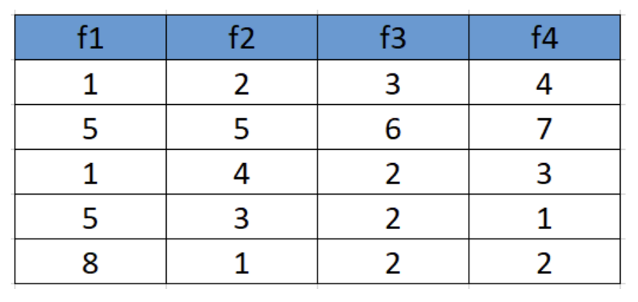


In [19]:
# Your code here.

A = np.matrix([[1,2,3,4],[5,5,6,7],[1,4,2,3],[5,3,2,1],[8,1,2,2]])

df = pd.DataFrame(A, columns=['f1','f2','f3','f4'])

print(df)

   f1  f2  f3  f4
0   1   2   3   4
1   5   5   6   7
2   1   4   2   3
3   5   3   2   1
4   8   1   2   2


## Step 2: Z-score로 데이터를 표준화하여 print하세요.

In [20]:
# your code here


df_std = (df-df.mean()) / df.std()

print(df_std)

         f1        f2        f3        f4
0 -1.000000 -0.632456  0.000000  0.260623
1  0.333333  1.264911  1.732051  1.563740
2 -1.000000  0.632456 -0.577350 -0.173749
3  0.333333  0.000000 -0.577350 -1.042493
4  1.333333 -1.264911 -0.577350 -0.608121


## Step 3: np.cov()를 사용해서 공분산 행렬을 print하세요.

In [21]:
# your code here

cov_matrix = np.cov(df_std.to_numpy(),rowvar=0,bias=True)

print(cov_matrix)

[[ 0.8        -0.25298221  0.03849002 -0.14479075]
 [-0.25298221  0.8         0.51120772  0.49449803]
 [ 0.03849002  0.51120772  0.8         0.75235479]
 [-0.14479075  0.49449803  0.75235479  0.8       ]]


## Step 4: LA.eig()를 사용해서 eigenvalue and eigenvector를 print하세요.

In [22]:
# your code here

w, v = LA.eig(cov_matrix)

print(w,v)


[2.01263459 0.8522308  0.31510964 0.02002497] [[ 0.16195986 -0.91705888 -0.30707099  0.19616173]
 [-0.52404813  0.20692161 -0.81731886  0.12061043]
 [-0.58589647 -0.3205394   0.1882497  -0.72009851]
 [-0.59654663 -0.11593512  0.44973251  0.65454704]]


## Step 5: np.matmul()를 사용해서 4개의 주성분(PCA Components)을 사용하여 주성분 공간으로 변환하세요.

In [23]:
# your code here

k = 4
B = v[:,:k]
transform_mat = np.matmul(df_std.to_numpy(),B)

print(transform_mat)

[[ 1.40033078e-02  7.55974765e-01  9.41199615e-01 -1.01852226e-01]
 [-2.55653399e+00 -7.80431775e-01 -1.06869861e-01 -5.75705265e-03]
 [-5.14801919e-02  1.25313470e+00 -3.96673397e-01  1.82141242e-01]
 [ 1.01415002e+00  2.38808310e-04 -6.79886182e-01 -2.01224649e-01]
 [ 1.57986086e+00 -1.22891650e+00  2.42229826e-01  1.26692685e-01]]


## Step 6: np.linalg.inv()를 사용해서 데이터를 원복하세요.

origin = np.matmul(transform_mat, B.T)

In [24]:
# your code here

origin2 = np.matmul(transform_mat, np.linalg.inv(B))

print(origin2)

[[-1.00000000e+00 -6.32455532e-01 -8.85338342e-17  2.60623346e-01]
 [ 3.33333333e-01  1.26491106e+00  1.73205081e+00  1.56374007e+00]
 [-1.00000000e+00  6.32455532e-01 -5.77350269e-01 -1.73748897e-01]
 [ 3.33333333e-01  4.27616026e-17 -5.77350269e-01 -1.04249338e+00]
 [ 1.33333333e+00 -1.26491106e+00 -5.77350269e-01 -6.08121140e-01]]


## K를 다르게 해서 결과를 확인해보자!


transform_matrix with 1 principal components
[[ 0.01400331]
 [-2.55653399]
 [-0.05148019]
 [ 1.01415002]
 [ 1.57986086]]
------------------------------------------------

         f1        f2        f3        f4
0  4.006804  2.988397  2.985789  3.380769
1  2.757832  5.118326  5.594377  6.911025
2  3.974987  3.042656  3.052242  3.470701
3  4.492755  2.159683  1.970838  2.007214
4  4.767622  1.690939  1.396753  1.230293
------------------------------------------------

transform_matrix with 2 principal components
[[ 1.40033078e-02  7.55974765e-01]
 [-2.55653399e+00 -7.80431775e-01]
 [-5.14801919e-02  1.25313470e+00]
 [ 1.01415002e+00  2.38808310e-04]
 [ 1.57986086e+00 -1.22891650e+00]]
------------------------------------------------

         f1        f2        f3        f4
0  1.926984  3.235731  2.566079  3.178997
1  4.904938  4.862991  6.027665  7.119324
2  0.527392  3.452646  2.356514  3.136235
3  4.492098  2.159761  1.970705  2.007150
4  8.148588  1.288872  2.079036  1.558294
----

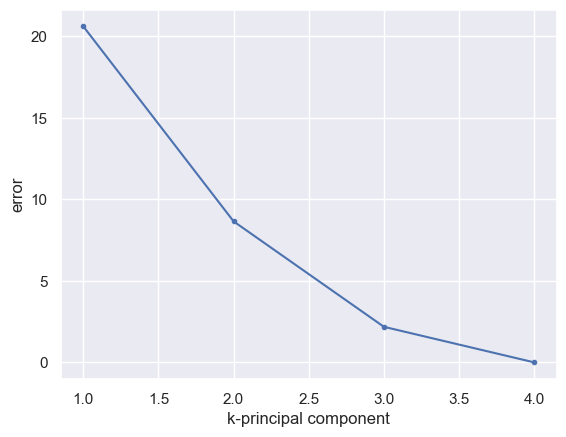

In [25]:
# tranform dataset to principal component space
err = []
pc = []
for k in range(1, 5):
    B = v[:, :k]
    B2 = np.matmul(np.transpose(B), B)
    B3 = np.matmul(B2, np.transpose(B))
    transform_mat = np.matmul(df_std.to_numpy(), np.transpose(B3))
    print(f"transform_matrix with {k} principal components")
    print(transform_mat)
    print('------------------------------------------------\n')

    # transform back to original space
    ori_std_mat = np.matmul(transform_mat, B3)
    ori_std_mat_df = pd.DataFrame(ori_std_mat, columns=['f1', 'f2', 'f3','f4'])
    ori_mat = ori_std_mat_df.multiply(df.std()) + df.mean()
    print(ori_mat)
    print('------------------------------------------------\n')

    # compute the error between df and the matrix converted back after PCA
    err.append(np.sum(np.abs(ori_mat.values - df.values)))
    pc.append(k)

plt.plot(pc, err, '.-')
plt.xlabel('k-principal component')
plt.ylabel('error')
plt.show()

In [10]:
#@title Q1: We observed that as k-principal component used increases, error decreases. What does this mean?
Answer = "Less information is lost if more principal components is used for transformation" #@param {type :'string'}

원본 고유값: [2.01263459 0.8522308  0.31510964 0.02002497]
고유값 shape: (4,)

정렬된 고유값: [2.01263459 0.8522308  0.31510964 0.02002497]
고유값 개수: 4 

Explained Variance Ratio 분석
PC1: 0.6289 (누적: 0.6289)
PC2: 0.2663 (누적: 0.8953)
PC3: 0.0985 (누적: 0.9937)
PC4: 0.0063 (누적: 1.0000)

95% 분산 설명에 필요한 최소 주성분 수: 3



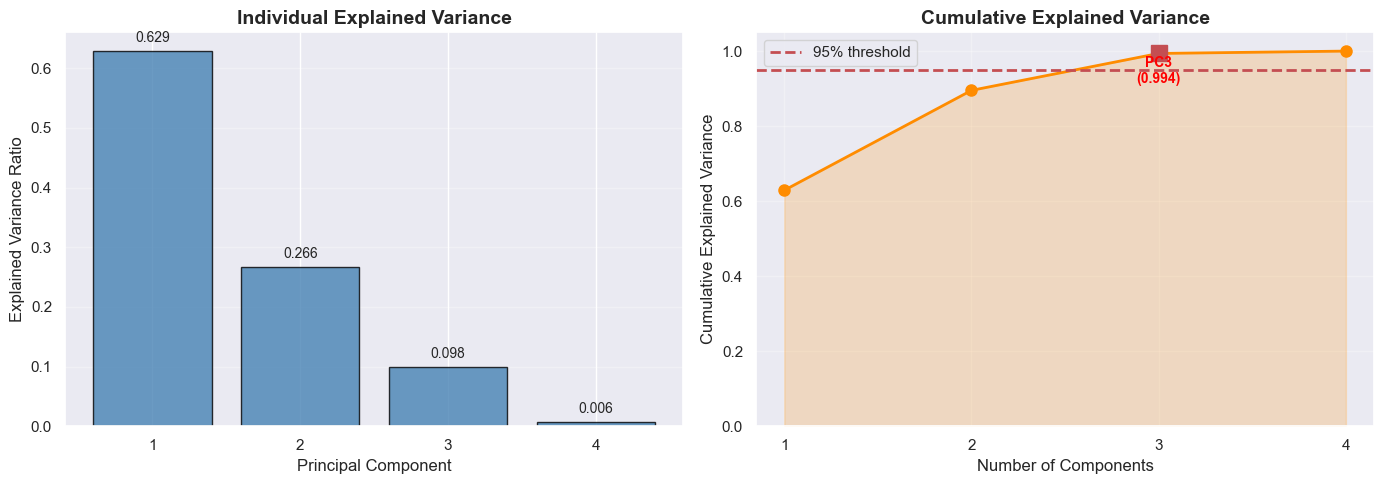

In [26]:
# ============================================================
# 추가 실험 1: Explained Variance Ratio 분석
# ============================================================
import os

os.makedirs("images/pca", exist_ok=True)

# 0. 공분산 행렬에서 고유값 계산
eigenvalues_raw, eigenvectors_raw = np.linalg.eig(cov_matrix) 
print(f"원본 고유값: {eigenvalues_raw}")
print(f"고유값 shape: {eigenvalues_raw.shape}\n")

# 1. 고유값 정렬 (내림차순)
sorted_indices = np.argsort(eigenvalues_raw)[::-1]
eigenvalues = eigenvalues_raw[sorted_indices]
eigenvectors = eigenvectors_raw[:, sorted_indices]

print("정렬된 고유값:", eigenvalues)
print("고유값 개수:", len(eigenvalues), "\n")

# 2. 각 주성분의 설명 분산 비율 계산
total_variance = np.sum(eigenvalues)
explained_variance = eigenvalues / total_variance
cumsum_variance = np.cumsum(explained_variance)

# 3. 결과 출력
print("=" * 60)
print("Explained Variance Ratio 분석")
print("=" * 60)
for i in range(len(eigenvalues)):
    print(f"PC{i+1}: {explained_variance[i]:.4f} (누적: {cumsum_variance[i]:.4f})")

# 4. 95% 분산 설명에 필요한 주성분 수
n_95 = np.argmax(cumsum_variance >= 0.95) + 1
print(f"\n95% 분산 설명에 필요한 최소 주성분 수: {n_95}")
print("=" * 60 + "\n")

# 5. 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 왼쪽: 개별 설명 분산 비율 (막대 그래프)
n_components = len(eigenvalues)
axes[0].bar(
    range(1, n_components + 1),
    explained_variance,
    color="steelblue",
    alpha=0.8,
    edgecolor="black",
)
axes[0].set_xlabel("Principal Component", fontsize=12)
axes[0].set_ylabel("Explained Variance Ratio", fontsize=12)
axes[0].set_title("Individual Explained Variance", fontsize=14, fontweight="bold")
axes[0].set_xticks(range(1, n_components + 1))
axes[0].grid(True, alpha=0.3, axis="y")

# 각 막대 위에 값 표시
for i, v in enumerate(explained_variance):
    axes[0].text(i + 1, v + 0.01, f"{v:.3f}", ha="center", va="bottom", fontsize=10)

# 오른쪽: 누적 설명 분산 비율 (선 그래프)
axes[1].plot(
    range(1, n_components + 1),
    cumsum_variance,
    "o-",
    linewidth=2,
    markersize=8,
    color="darkorange",
)
axes[1].axhline(y=0.95, color="r", linestyle="--", linewidth=2, label="95% threshold")
axes[1].fill_between(
    range(1, n_components + 1), 0, cumsum_variance, alpha=0.2, color="darkorange"
)
axes[1].set_xlabel("Number of Components", fontsize=12)
axes[1].set_ylabel("Cumulative Explained Variance", fontsize=12)
axes[1].set_title("Cumulative Explained Variance", fontsize=14, fontweight="bold")
axes[1].set_xticks(range(1, n_components + 1))
axes[1].set_ylim([0, 1.05])
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

# 95% 지점 표시
if n_95 <= n_components:
    axes[1].plot(n_95, cumsum_variance[n_95 - 1], "rs", markersize=12)
    axes[1].text(
        n_95,
        cumsum_variance[n_95 - 1] - 0.08,
        f"PC{n_95}\n({cumsum_variance[n_95-1]:.3f})",
        ha="center",
        fontsize=10,
        color="red",
        fontweight="bold",
    )

plt.tight_layout()
plt.savefig("images/pca/explained_variance.png", dpi=150, bbox_inches="tight")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Scree Plot - Elbow Method를 통한 주성분 선택
PC1: 고유값 = 2.012635
PC2: 고유값 = 0.852231
PC3: 고유값 = 0.315110
PC4: 고유값 = 0.020025



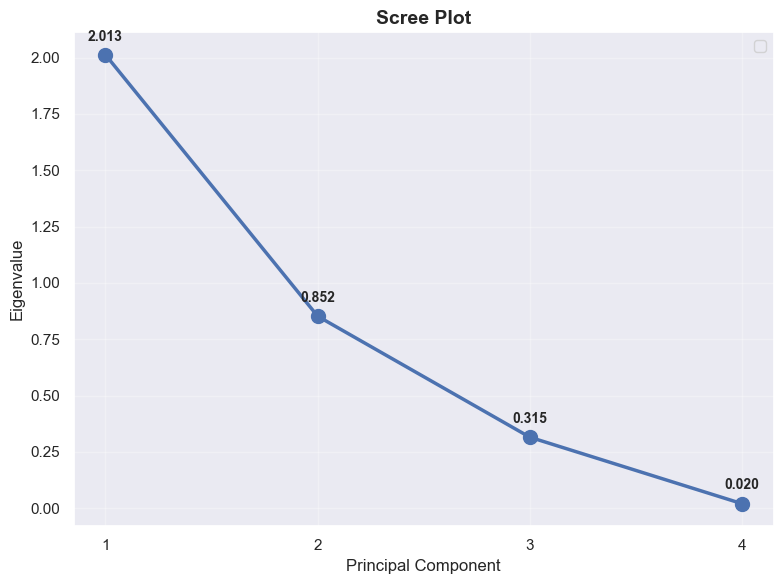

In [27]:
# ============================================================
# 추가 실험 2: Scree Plot (Elbow Method)
# ============================================================

print("\n" + "=" * 60)
print("Scree Plot - Elbow Method를 통한 주성분 선택")
print("=" * 60)

# 고유값 출력
for i, ev in enumerate(eigenvalues, 1):
    print(f"PC{i}: 고유값 = {ev:.6f}")

print("=" * 60 + "\n")

# 시각화
plt.figure(figsize=(8, 6))
plt.plot(
    range(1, len(eigenvalues) + 1), eigenvalues, "bo-", linewidth=2.5, markersize=10
)

plt.xlabel("Principal Component", fontsize=12)
plt.ylabel("Eigenvalue", fontsize=12)
plt.title("Scree Plot", fontsize=14, fontweight="bold")
plt.xticks(range(1, len(eigenvalues) + 1))
plt.grid(True, alpha=0.3)

# 각 점 위에 값 표시
for i, v in enumerate(eigenvalues):
    plt.text(
        i + 1,
        v + 0.05,
        f"{v:.3f}",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold",
    )

plt.legend()
plt.tight_layout()
plt.savefig("images/pca/scree_plot.png", dpi=150, bbox_inches="tight")
plt.show()

## Section 2 : 더미 데이터로 확인해보자!

In [28]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

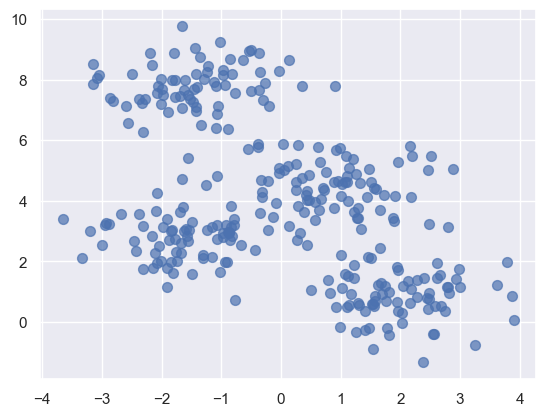

In [29]:
# generate the coordinate pairs
points, cluster_indexes = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=0)

x = points[:, 0]
y = points[:, 1]

plt.scatter(x, y, s=50, alpha=0.7)

### K가 다를때 어떻게 해석할 수 있는지 확인해보자!

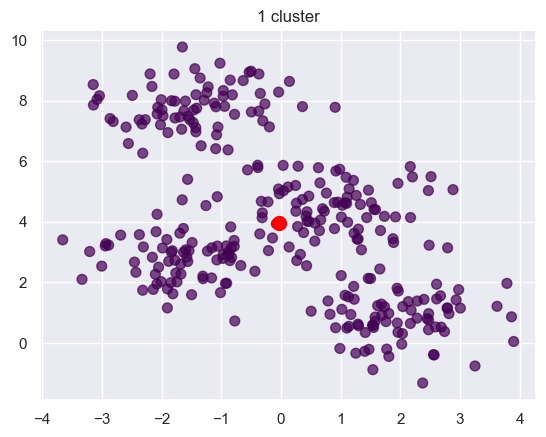

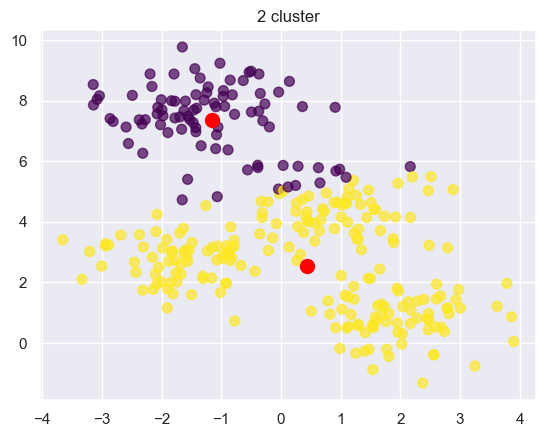

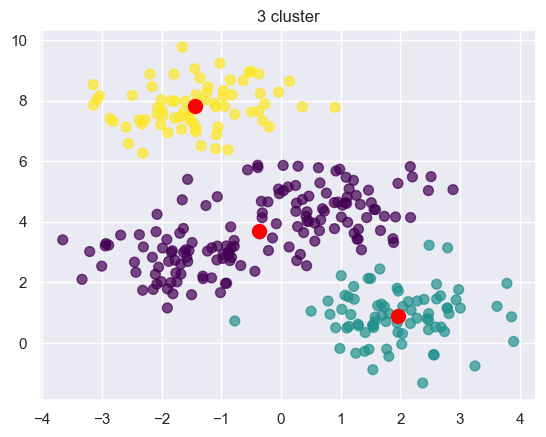

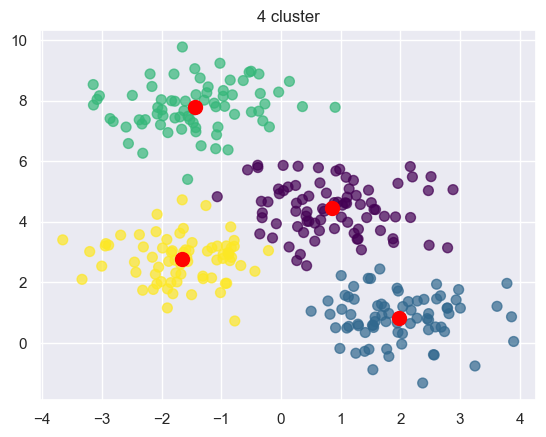

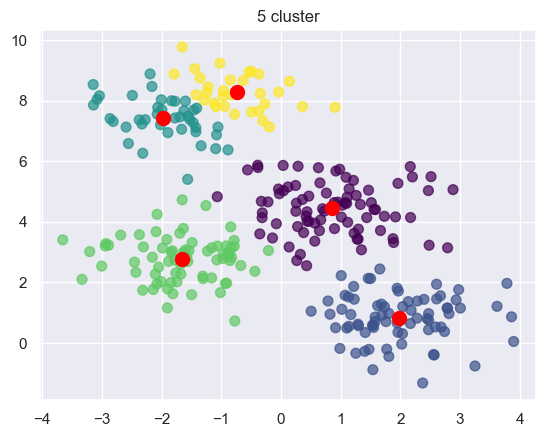

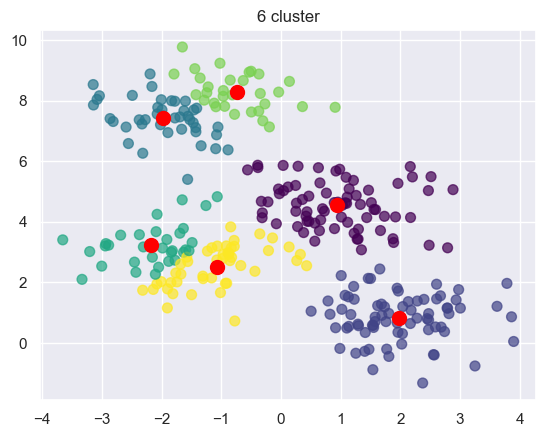

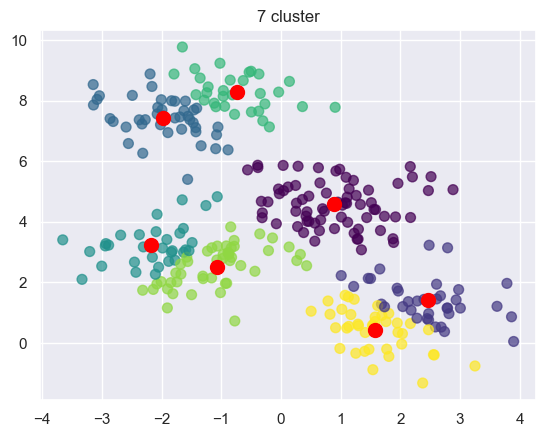

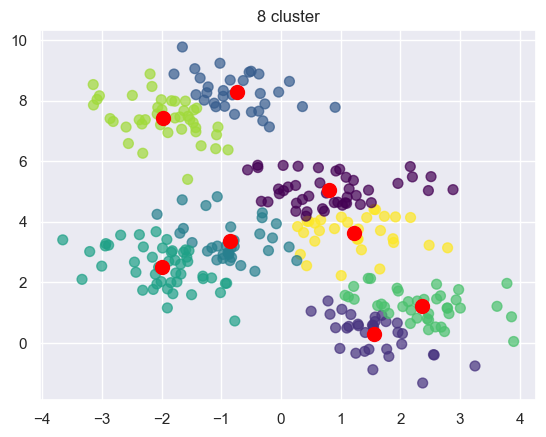

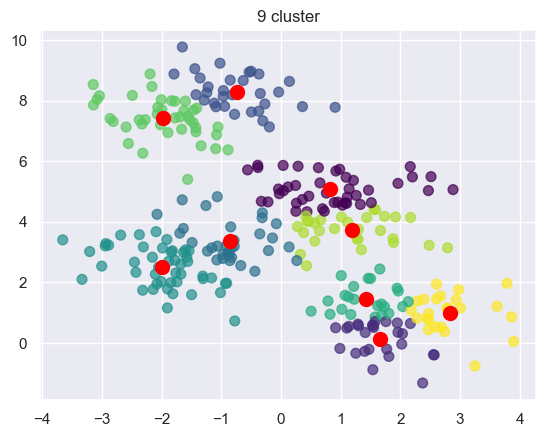

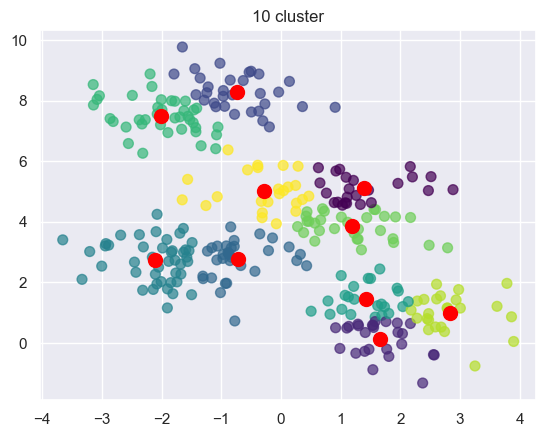

In [30]:
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(points)
  predicted_cluster_indexes = kmeans.predict(points)

  plt.figure()
  plt.title(f'%d cluster' % (k))
  plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')

  centers = kmeans.cluster_centers_
  plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)


# Choose the best K - elbow method

Text(0, 0.5, 'Inertia')

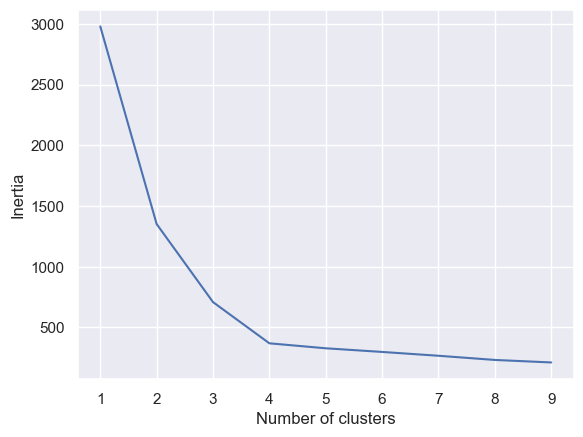

In [31]:
inertias = []

for i in range(1, 10):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(points)
  inertias.append(kmeans.inertia_)

plt.plot(range(1, 10), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')


Silhouette Score 분석
K=2: Silhouette Score = 0.4830
K=3: Silhouette Score = 0.5151
K=4: Silhouette Score = 0.5801
K=5: Silhouette Score = 0.5140
K=6: Silhouette Score = 0.4360
K=7: Silhouette Score = 0.3631
K=8: Silhouette Score = 0.3277
K=9: Silhouette Score = 0.3323
K=10: Silhouette Score = 0.3436

Silhouette Score 기준 최적 K: 4 (Score: 0.5801)



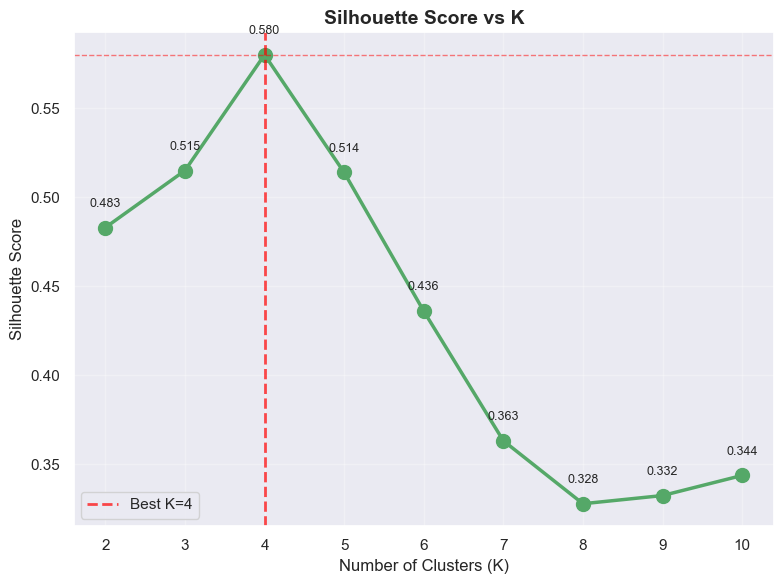

Elbow Method 결과: K=4
Silhouette Score 결과: K=4
→ 일치함


In [32]:
# ============================================================
# 추가 실험 3: Silhouette Score 분석
# ============================================================

from sklearn.metrics import silhouette_score

print("\n" + "=" * 60)
print("Silhouette Score 분석")
print("=" * 60)

# K=2~10에 대해 Silhouette Score 계산 (K=1은 정의 불가)
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(points)
    score = silhouette_score(points, labels)
    silhouette_scores.append(score)
    print(f"K={k}: Silhouette Score = {score:.4f}")

print("=" * 60 + "\n")

# 최적 K 찾기
best_k = K_range[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
print(f"Silhouette Score 기준 최적 K: {best_k} (Score: {best_score:.4f})")
print("=" * 60 + "\n")

# 시각화
plt.figure(figsize=(8, 6))
plt.plot(K_range, silhouette_scores, "go-", linewidth=2.5, markersize=10)

plt.xlabel("Number of Clusters (K)", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.title("Silhouette Score vs K", fontsize=14, fontweight="bold")
plt.xticks(K_range)
plt.grid(True, alpha=0.3)

# 각 점 위에 값 표시
for k, score in zip(K_range, silhouette_scores):
    plt.text(k, score + 0.01, f"{score:.3f}", ha="center", va="bottom", fontsize=9)

# 최적 K 강조
plt.axvline(
    x=best_k,
    color="red",
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label=f"Best K={best_k}",
)
plt.axhline(y=best_score, color="red", linestyle="--", linewidth=1, alpha=0.5)
plt.legend(fontsize=11)

plt.tight_layout()
plt.savefig("images/kmeans/silhouette_scores.png", dpi=150, bbox_inches="tight")
plt.show()

# Elbow Method와 비교
print(f"Elbow Method 결과: K=4")
print(f"Silhouette Score 결과: K={best_k}")
print(f"→ {'일치함' if best_k == 4 else '차이 있음'}")

In [33]:
#@title Q2: Which k is the best based on elbow method?
Answer = "4" #@param ["Choose your answer", "2", "3", "4", "5"]

In [34]:
#@title Q3: Why?
Answer = "Elbow plot에서 k=4 이후 inertia 감소율이 급격히 둔화되는 'elbow' 형태가 나타난다." #@param {type :'string'}

# Section 3: Faces recognition example using SVMs



In [35]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [38]:
# Download the data and load it in as a set of numpy arrays
# min_faces_per_person limits the dataset to have the image with at least that amount
lfw_people = fetch_lfw_people(min_faces_per_person=60, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the ID of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print ("Total dataset size:")
print ("n_samples: %d" % n_samples)
print ("n_features: %d" % n_features)
print ("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1348
n_features: 1850
n_classes: 8


([], [])

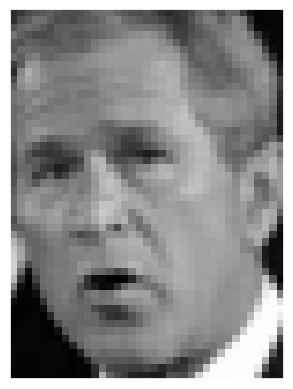

In [39]:
## Look at the data
visualize_face = np.random.randint(0, n_samples)

# Plotting the grey image of the above index
plt.figure(figsize=(3.6, 4.8))
plt.imshow(X[visualize_face].reshape((h, w)), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())


Section 3: LFW 데이터셋 로딩
샘플 수 (n_samples): 1348
이미지 크기 (h x w): 50 x 37
특성 수 (h x w): 1850
클래스 수 (인물 수): 8
인물 목록: ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']



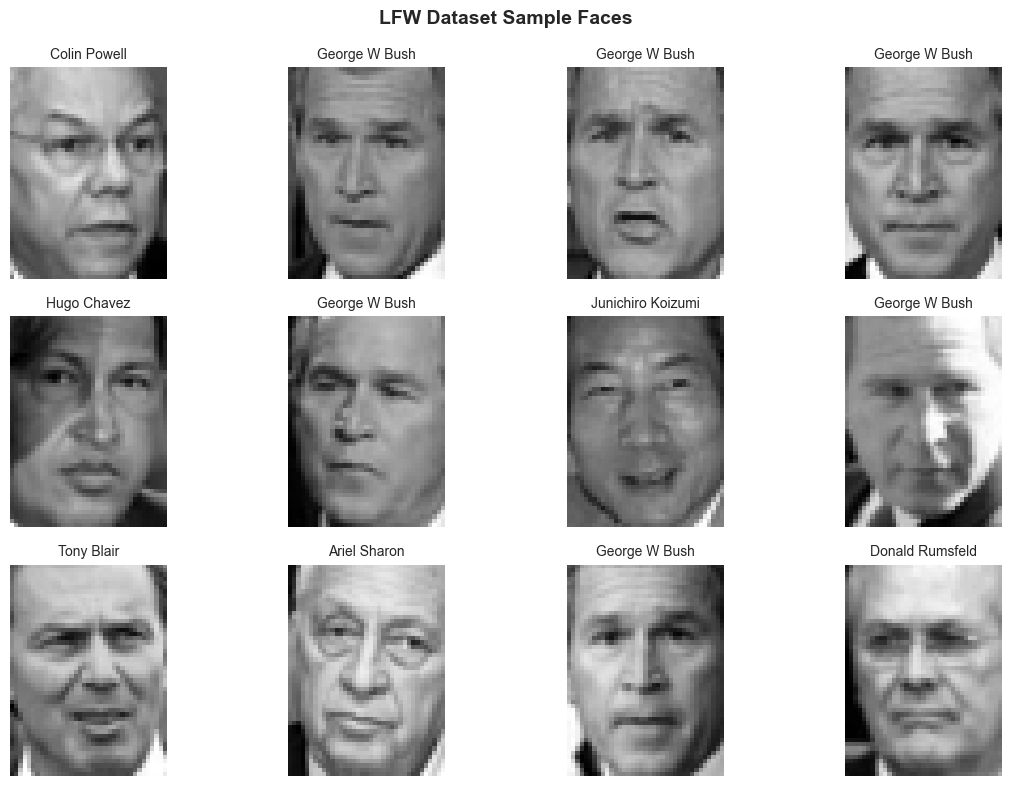

샘플 이미지 저장 완료: images/faces/sample_faces.png


In [40]:
# ============================================================
# Section 3: SVM과 PCA를 이용한 얼굴 인식
# ============================================================

from sklearn.datasets import fetch_lfw_people

print("\n" + "=" * 60)
print("Section 3: LFW 데이터셋 로딩")
print("=" * 60)

# LFW 데이터셋 로드 (min_faces_per_person=60)
lfw_people = fetch_lfw_people(min_faces_per_person=60, resize=0.4)

# 데이터 추출
X = lfw_people.data  # 특성 벡터 (n_samples x n_features)
y = lfw_people.target  # 레이블
target_names = lfw_people.target_names  # 인물 이름
n_samples, h, w = lfw_people.images.shape  # 이미지 shape

# 데이터셋 정보 출력
print(f"샘플 수 (n_samples): {n_samples}")
print(f"이미지 크기 (h x w): {h} x {w}")
print(f"특성 수 (h x w): {h * w}")
print(f"클래스 수 (인물 수): {len(target_names)}")
print(f"인물 목록: {target_names}")
print("=" * 60 + "\n")

# 샘플 이미지 폴더 생성
import os

os.makedirs("images/faces", exist_ok=True)

# 샘플 이미지 시각화 (3x4 = 12개)
fig = plt.figure(figsize=(12, 8))
for i in range(12):
    ax = fig.add_subplot(3, 4, i + 1)
    ax.imshow(lfw_people.images[i], cmap="gray")
    ax.set_title(target_names[y[i]], fontsize=10)
    ax.axis("off")

plt.suptitle("LFW Dataset Sample Faces", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.savefig("images/faces/sample_faces.png", dpi=150, bbox_inches="tight")
plt.show()

print("샘플 이미지 저장 완료: images/faces/sample_faces.png")

In [41]:
# split into a training (80%) and testing (20%) set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Apply PCA to X features, we can change the n_components later
n_components = 150

print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))

pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)

# reconstructing the images from pca output --> eigenfaces
eigenfaces = pca.components_.reshape((n_components, h, w))

# Applying pca to training and test set
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Extracting the top 150 eigenfaces from 1078 faces


In [43]:
print("Fitting the classifier to the training set")

# Hyperparameter Tuning
## parameters C and gamma for SVM, see lecture 10 for more explanation
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }

# Creating SVM classifier with GridSearch
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, cv=5, n_jobs=3)

# Training our classfier
clf = clf.fit(X_train_pca, y_train)

print("Best estimator found by grid search: \n{}".format(clf.best_estimator_))


Fitting the classifier to the training set
Best estimator found by grid search: 
SVC(C=1000.0, class_weight='balanced', gamma=0.005)


In [44]:
# Evaluation of the model quality on the test set
print("Predicting people's names on the test set\n")
# Predictin for the test set
y_pred = clf.predict(X_test_pca)

# Prediction results
print(classification_report(y_test, y_pred, target_names=target_names))

Predicting people's names on the test set

                   precision    recall  f1-score   support

     Ariel Sharon       0.86      0.50      0.63        12
     Colin Powell       0.83      0.88      0.86        51
  Donald Rumsfeld       0.91      0.80      0.85        25
    George W Bush       0.79      0.95      0.87        98
Gerhard Schroeder       1.00      0.71      0.83        21
      Hugo Chavez       1.00      0.60      0.75        15
Junichiro Koizumi       1.00      0.80      0.89        10
       Tony Blair       0.87      0.87      0.87        38

         accuracy                           0.85       270
        macro avg       0.91      0.76      0.82       270
     weighted avg       0.86      0.85      0.84       270



## 결과를 확인해보자!


In [45]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=5):
    """Helper function to plot a gallery of portraits

       inputs:
          images (numpy array) : array of images that we want to show
          titles (string array) :
          h (int) : height of the image
          w (int) : width of the image
          n_row (int) :
          n_col (int) :
    """
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


def title(y_pred, y_test, target_names, i):
    """Helper function to generate the title
    inputs:
      y_pred : List of predictions
      y_test :

    outputs:
    """
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)


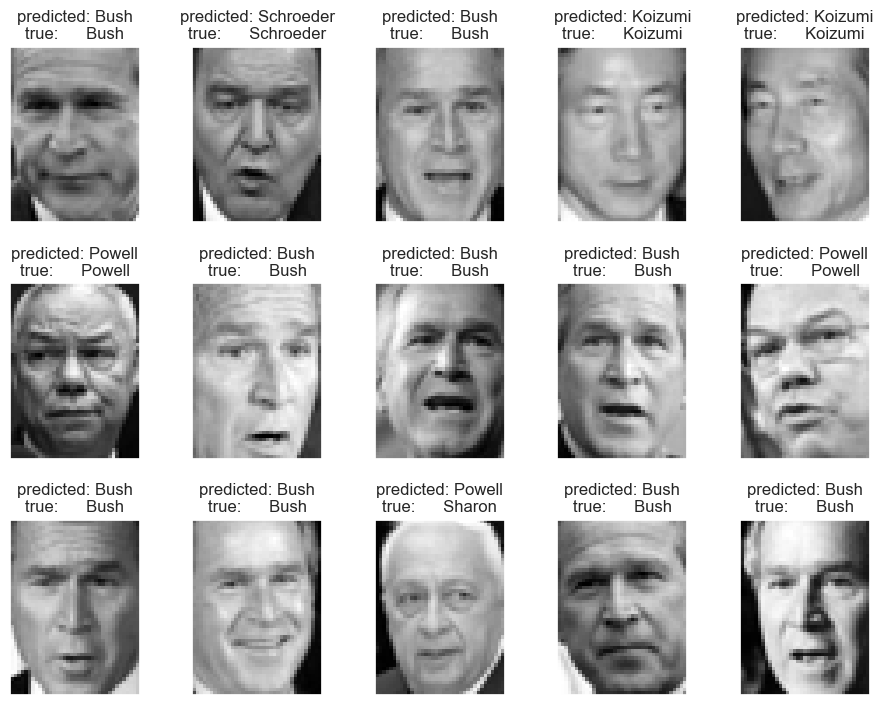

In [46]:
# Generate titles with predicted and true labels for the images
prediction_titles = [title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])]
# Call the plot function with necessary parameters
plot_gallery(X_test, prediction_titles, h, w)

plt.show()

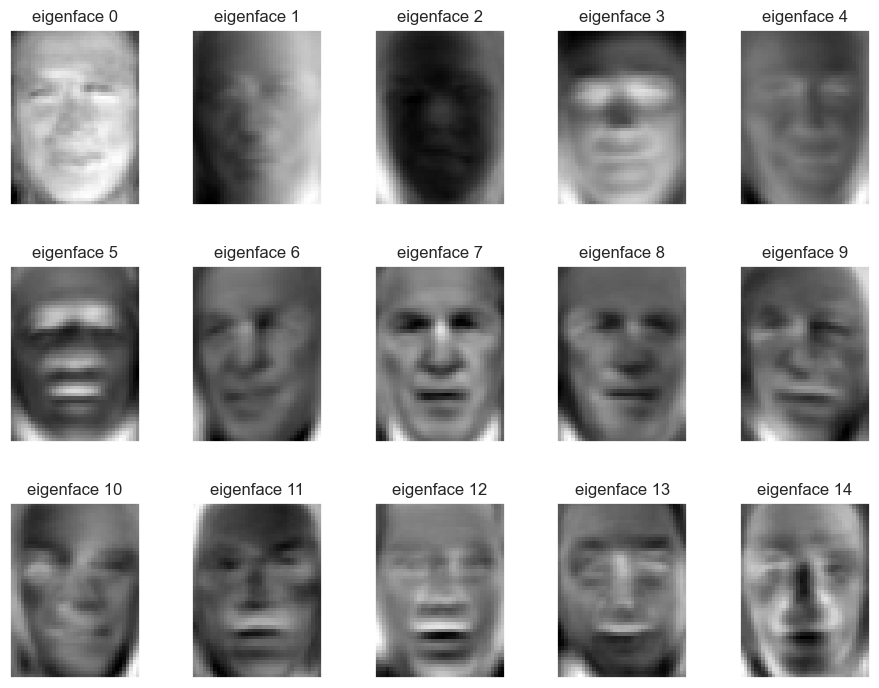

In [47]:
# plot the gallery of the most significative eigenfaces
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]

plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

In [48]:
#@title Q4: Which PCA components give the best results?
Answer = "n_components = 150" #@param ["Choose your answer", "n_components = 50", "n_components = 100", "n_components = 150", "n_components = 200"]

In [49]:
#@title Q5: Why?
Answer = "n_components=150에서 정확도가 최고를 기록했으며, 전체 분산의 94.64%를 설명한다. 이는 충분한 정보를 보존하면서도 과적합을 방지하는 최적 균형점이다. n=200에서는 설명 분산이 96.40%로 더 높지만 정확도가 78.89%로 급락하는데, 이는 추가된 성분들이 노이즈로 작용하기 때문이다." #@param {type :'string'}


추가 실험 5: n_components 비교

n_components = 50 학습 중...
  정확도: 0.8000
  학습 시간: 0.49초
  설명 분산: 0.8485

n_components = 100 학습 중...
  정확도: 0.8519
  학습 시간: 1.67초
  설명 분산: 0.9160

n_components = 150 학습 중...
  정확도: 0.8630
  학습 시간: 1.45초
  설명 분산: 0.9464

n_components = 200 학습 중...
  정확도: 0.7630
  학습 시간: 3.30초
  설명 분산: 0.9640

결과 요약
n_comp     Accuracy     Time(s)      Explained Var.
------------------------------------------------------------
50         0.8000       0.49         0.8485
100        0.8519       1.67         0.9160
150        0.8630       1.45         0.9464
200        0.7630       3.30         0.9640


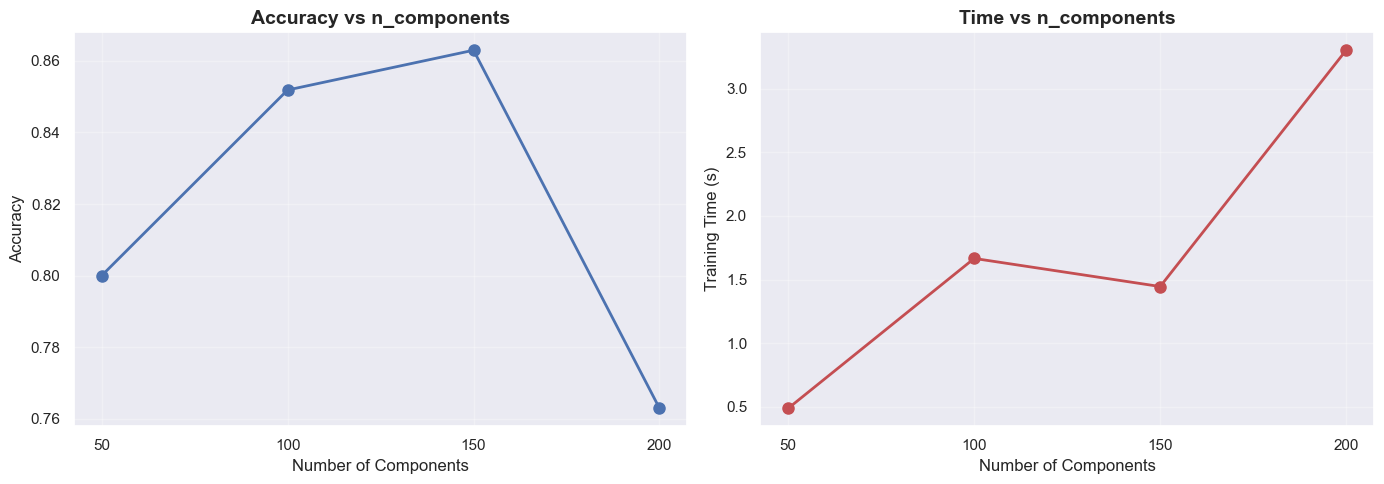


저장 완료: images/faces/n_components_comparison.png


In [50]:
# ============================================================
# 추가 실험 5: PCA 성분 수에 따른 성능 비교
# ============================================================
import time

print("\n" + "=" * 60)
print("추가 실험 5: n_components 비교")
print("=" * 60)

n_comp_list = [50, 100, 150, 200]
results = []

for n_comp in n_comp_list:
    print(f"\nn_components = {n_comp} 학습 중...")
    start = time.time()
    
    # PCA
    pca_temp = PCA(n_components=n_comp, svd_solver='randomized', whiten=True)
    pca_temp.fit(X_train)
    X_train_pca_temp = pca_temp.transform(X_train)
    X_test_pca_temp = pca_temp.transform(X_test)
    
    # SVM (최적 파라미터 사용)
    clf_temp = SVC(kernel='rbf', C=1000.0, gamma=0.005, class_weight='balanced')
    clf_temp.fit(X_train_pca_temp, y_train)
    
    # 평가
    accuracy = clf_temp.score(X_test_pca_temp, y_test)
    elapsed = time.time() - start
    explained_var = pca_temp.explained_variance_ratio_.sum()
    
    results.append({
        'n_comp': n_comp,
        'accuracy': accuracy,
        'time': elapsed,
        'explained_var': explained_var
    })
    
    print(f"  정확도: {accuracy:.4f}")
    print(f"  학습 시간: {elapsed:.2f}초")
    print(f"  설명 분산: {explained_var:.4f}")

print("\n" + "=" * 60)
print("결과 요약")
print("=" * 60)
print(f"{'n_comp':<10} {'Accuracy':<12} {'Time(s)':<12} {'Explained Var.'}")
print("-" * 60)
for r in results:
    print(f"{r['n_comp']:<10} {r['accuracy']:<12.4f} {r['time']:<12.2f} {r['explained_var']:.4f}")

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

n_comps = [r['n_comp'] for r in results]
accs = [r['accuracy'] for r in results]
times = [r['time'] for r in results]

# 정확도 그래프
axes[0].plot(n_comps, accs, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Components', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Accuracy vs n_components', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(n_comps)

# 학습 시간 그래프
axes[1].plot(n_comps, times, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Components', fontsize=12)
axes[1].set_ylabel('Training Time (s)', fontsize=12)
axes[1].set_title('Time vs n_components', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(n_comps)

plt.tight_layout()
plt.savefig('images/faces/n_components_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n저장 완료: images/faces/n_components_comparison.png")


추가 실험 6: Confusion Matrix


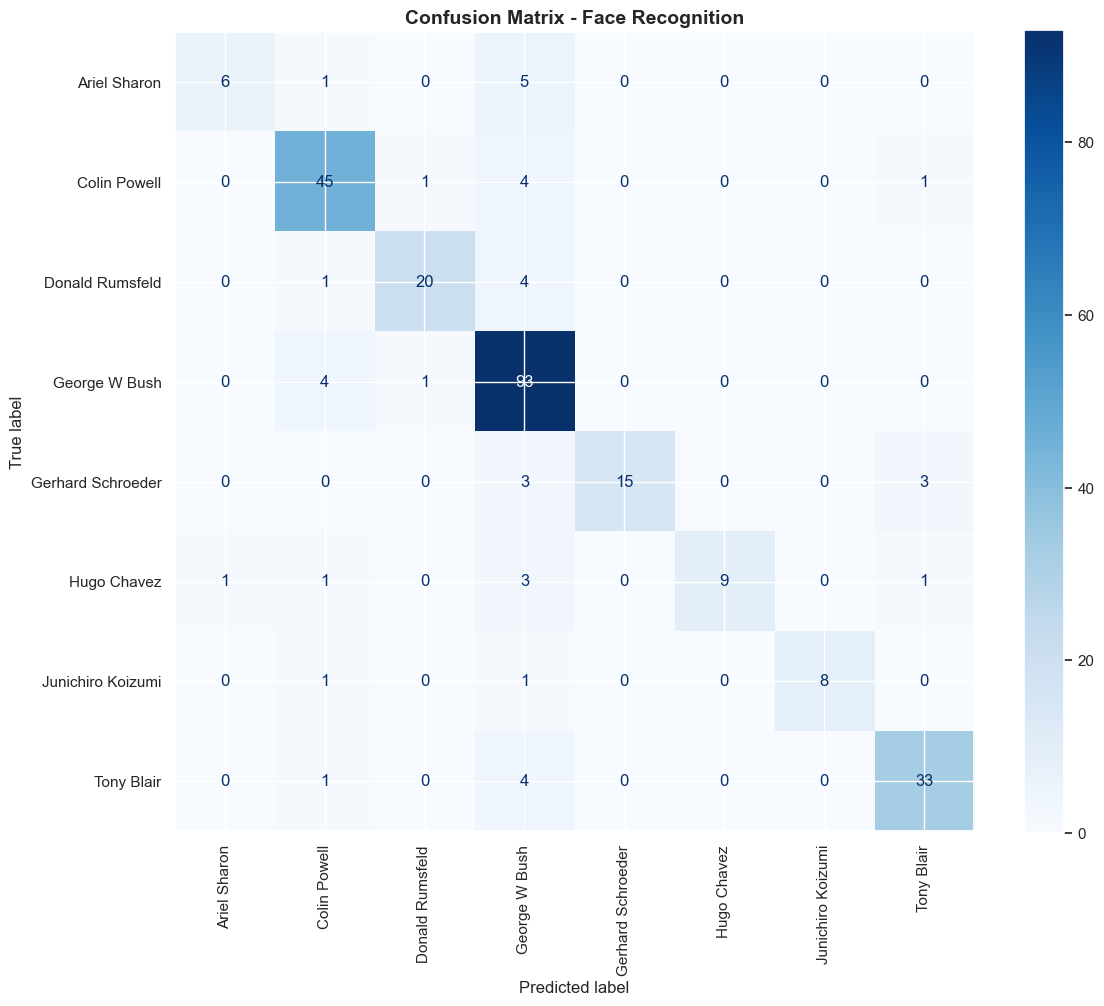

저장 완료: images/faces/confusion_matrix_detailed.png

가장 많이 혼동된 인물 쌍:
  Ariel Sharon → George W Bush: 5건
  Colin Powell → George W Bush: 4건
  Donald Rumsfeld → George W Bush: 4건
  George W Bush → Colin Powell: 4건
  Tony Blair → George W Bush: 4건
  Gerhard Schroeder → George W Bush: 3건
  Gerhard Schroeder → Tony Blair: 3건
  Hugo Chavez → George W Bush: 3건
  Ariel Sharon → Colin Powell: 1건
  Colin Powell → Donald Rumsfeld: 1건

총 오분류 건수: 41/270
전체 정확도: 0.8481


In [51]:
# ============================================================
# 추가 실험 6: Confusion Matrix 분석
# ============================================================
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

print("\n" + "=" * 60)
print("추가 실험 6: Confusion Matrix")
print("=" * 60)

# Confusion Matrix 생성 및 시각화
fig, ax = plt.subplots(figsize=(12, 10))
ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test_pca,
    y_test,
    display_labels=target_names,
    ax=ax,
    cmap='Blues',
    xticks_rotation=90
)
plt.title('Confusion Matrix - Face Recognition', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('images/faces/confusion_matrix_detailed.png', dpi=150, bbox_inches='tight')
plt.show()

print("저장 완료: images/faces/confusion_matrix_detailed.png")

cm = confusion_matrix(y_test, y_pred)

print("\n가장 많이 혼동된 인물 쌍:")
confusion_pairs = []
for i in range(len(target_names)):
    for j in range(len(target_names)):
        if i != j and cm[i][j] > 0:
            confusion_pairs.append((target_names[i], target_names[j], cm[i][j]))

confusion_pairs.sort(key=lambda x: x[2], reverse=True)

for pair in confusion_pairs[:10]:
    print(f"  {pair[0]} → {pair[1]}: {pair[2]}건")

print(f"\n총 오분류 건수: {np.sum(cm) - np.trace(cm)}/{np.sum(cm)}")
print(f"전체 정확도: {np.trace(cm)/np.sum(cm):.4f}")